
                                                          
                                                          Data Preparation and Cleaning

                                                          

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Unified Mentor\Coffee Sales Data\index.csv")

In [3]:
data.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [6]:
data.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [6]:
print("Total number of rows are:", data.shape[0]) 

Total number of rows are: 1133


In [8]:
print("Total number of Columns are:", data.shape[1])

Total number of Columns are: 6


In [9]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [10]:
data.describe(include=['object'])

,date,datetime,cash_type,card,coffee_name
count,1133,1133,1133,1044,1133
unique,150,1133,2,446,8
top,2024-07-30,2024-07-31 21:55:16.570,card,ANON-0000-0000-0012,Americano with Milk
freq,24,1,1044,88,268




                                                            Check for missing values

                                                            

In [3]:
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [4]:
print("Total number of missing values across all columns are:", data.isnull().sum().sum())

Total number of missing values across all columns are: 89


In [5]:
for column in data.columns[data.isnull().any()]:
    print(f"Column: '[{column}]' has {data[column].isnull().sum()} missing values")

Column: '[card]' has 89 missing values




                                                        Handling Missing Values

                                                        

As here we have missing values only in card column, therefore we have to handle the missing values with the mode as the card column is categorical and the values remained after applying mode will be replaced by NAN

In [6]:
data['card'].fillna(data['card'].mode()[0], inplace=True)
data.fillna(np.nan, inplace=True)


In [7]:
data.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64



                                                            Converting Data Types

                                                            

In [6]:
## Convert Date to datetime type
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.dtypes

date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


                                                                
                                                                Feature Engineering
                                                        Extract month and year from the Date

                                                                

In [8]:
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month


In [11]:
# Drop the original Date column
data.drop(columns=['date'], inplace=True)

In [12]:
data.head()

,datetime,cash_type,card,money,coffee_name,Year,Month
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024,3
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024,3
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024,3




                                                        Exploratory Data Analysis (EDA)

                                                        

In [13]:
correlation_matrix = data.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          money  Year     Month
money  1.000000   NaN -0.291433
Year        NaN   NaN       NaN
Month -0.291433   NaN  1.000000


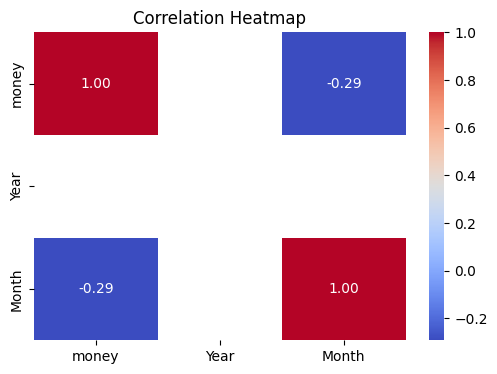

In [15]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

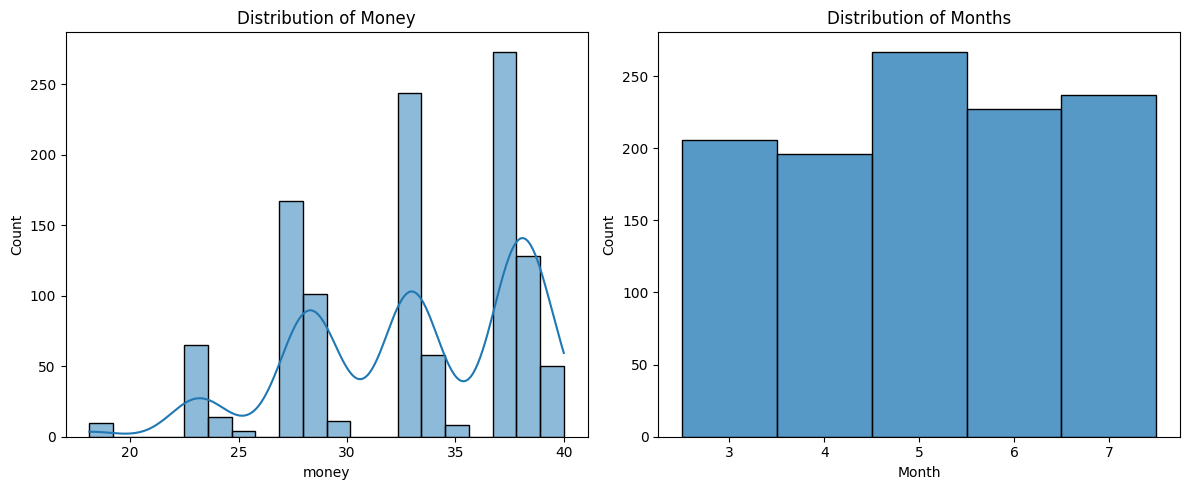

In [14]:
# Histograms for numerical columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data['money'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Money")

sns.histplot(data['Month'], bins=5, discrete=True, kde=False, ax=axes[1])
axes[1].set_title("Distribution of Months")

plt.tight_layout()
plt.show()

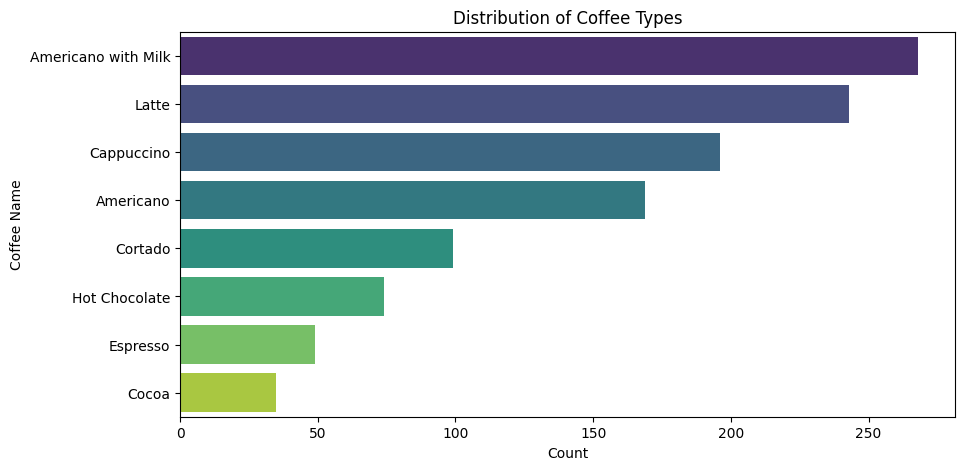

In [17]:
# Bar plot for categorical variable: coffee_name
plt.figure(figsize=(10, 5))
sns.countplot(y=data['coffee_name'], order=data['coffee_name'].value_counts().index, palette="viridis")
plt.title("Distribution of Coffee Types")
plt.xlabel("Count")
plt.ylabel("Coffee Name")
plt.show()



                                                    Machine Learning Modeling
                                                        Splitting the Data

                                                        

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
target = "money"
y = data[target]

In [24]:
#Numerical Features Only
num_features = data.select_dtypes(include=['number']).columns.drop(target)  # Exclude target
X_num = data[num_features]

# Split the data
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

# Train numerical-only model
model_num = LinearRegression()
model_num.fit(X_train_num, y_train)
y_pred_num = model_num.predict(X_test_num)

def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2 Score": r2_score(y_true, y_pred)
    }
results_num = evaluate_model(y_test, y_pred_num)
print("\n🔹 Numerical Features Model Performance:")
print(results_num)


🔹 Numerical Features Model Performance:
{'MAE': 3.785170241529704, 'MSE': 19.54196314789827, 'RMSE': np.float64(4.420629270578824), 'R2 Score': -0.049713546156701316}



                                                    
                                                    Model Interpretation and Conclusion
                                            You can interpret the model by looking at the coefficients

                                            

Model Coefficients:
        Feature  Coefficient
0    cash_type    -2.812850
1  coffee_name     0.735791
2         hour     0.158905
3  day_of_week     0.081626


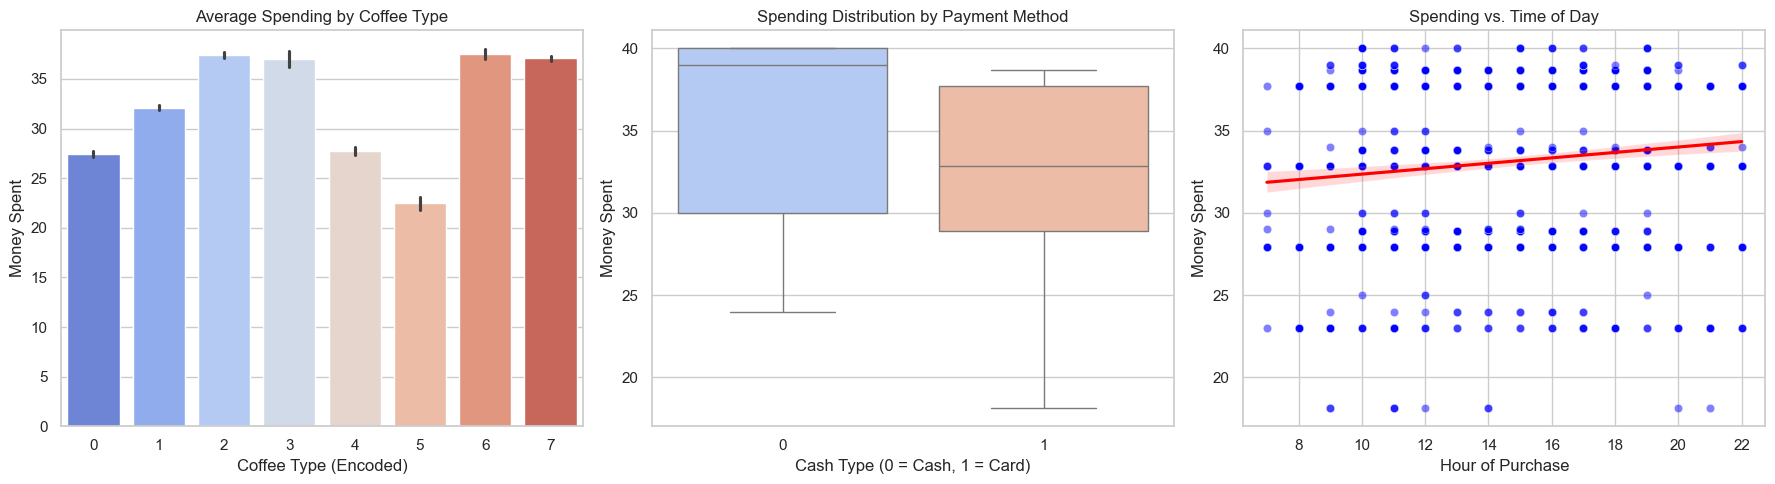

In [6]:
# Data Preprocessing
df_clean = data.copy()
df_clean["cash_type"] = df_clean["cash_type"].apply(lambda x: 1 if x == "card" else 0)
df_clean["card"] = df_clean["card"].fillna("Unknown")
df_clean["coffee_name"] = df_clean["coffee_name"].astype("category").cat.codes
df_clean["datetime"] = pd.to_datetime(df_clean["datetime"])
df_clean["hour"] = df_clean["datetime"].dt.hour
df_clean["day_of_week"] = df_clean["datetime"].dt.dayofweek
df_clean = df_clean.drop(columns=["date", "datetime", "card"])

# Define X and y
X = df_clean.drop(columns=["money"])
y = df_clean["money"]

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("Model Coefficients:\n", coefficients)

# Visualization
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar Plot: Coffee Type vs. Spending
sns.barplot(x=df_clean["coffee_name"], y=df_clean["money"], ax=axes[0], palette="coolwarm")
axes[0].set_title("Average Spending by Coffee Type")
axes[0].set_xlabel("Coffee Type (Encoded)")
axes[0].set_ylabel("Money Spent")

# Box Plot: Cash Type vs. Spending
sns.boxplot(x=df_clean["cash_type"], y=df_clean["money"], ax=axes[1], palette="coolwarm")
axes[1].set_title("Spending Distribution by Payment Method")
axes[1].set_xlabel("Cash Type (0 = Cash, 1 = Card)")
axes[1].set_ylabel("Money Spent")

# Scatter Plot: Hour vs. Spending
sns.scatterplot(x=df_clean["hour"], y=df_clean["money"], ax=axes[2], alpha=0.5, color="blue")
sns.regplot(x=df_clean["hour"], y=df_clean["money"], ax=axes[2], scatter=False, color="red")
axes[2].set_title("Spending vs. Time of Day")
axes[2].set_xlabel("Hour of Purchase")
axes[2].set_ylabel("Money Spent")

plt.tight_layout()
plt.show()

In [5]:
data.to_csv("Updated Coffee Sales Data.csv")


                                                                    
                                                                    --END--

                                                                    